In [52]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
from scipy.io import wavfile as wav
import numpy as np
import pandas as pd


### Mel-frequency cepstrum coefficients

The sample rate is 22050 and the audio data is [-1.2772126e-07 -2.6762461e-06  1.0470579e-05 ...  1.6908690e-04
  1.8034471e-04  2.1558130e-04] 
The tempo is 103.359375 and the beat frame is [ 130  152  176  198  224  249  273  299  324  346  373  397  421  445
  469  492  515  540  563  588  613  640  667  693  717  742  766  790
  815  839  865  891  916  939  966  994 1018 1041 1065 1089 1113 1137
 1163 1189 1214 1237 1263 1288 1312 1338 1364 1390 1415 1441 1466 1491
 1520 1547 1571 1596 1623 1651 1679 1708 1736 1763 1791 1816 1841 1867
 1894 1921 1947 1973 2000 2025 2048 2076 2102 2130 2158 2184 2208 2234
 2258 2283 2306 2330 2355 2382 2408 2435 2458 2484 2509 2535 2560 2586
 2611 2638 2664 2690 2716 2742 2768 2794 2821 2848]


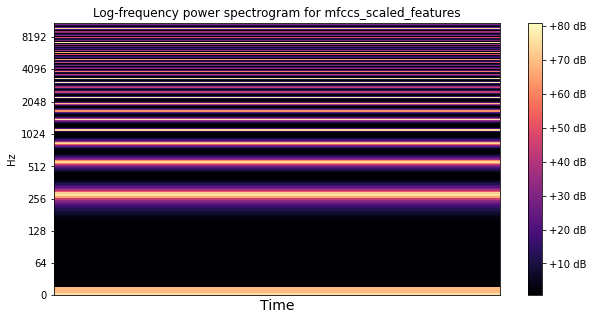

In [68]:
filename= 'BallRacketWithWilsonAtHome.wav'
ipd.Audio(filename)
audio, sample_rate = librosa.load(filename)

#audio data
print(f'The sample rate is {sample_rate} and the audio data is {audio} ')
#beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=audio, sr=sample_rate)
print(f'The tempo is {tempo} and the beat frame is {beat_frames}')
# feature extraction
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc =40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
#graph plotting
plot_spectrogram(mfccs_scaled_features, 'mfccs_scaled_features')

### Mel Spectrograms

In [61]:
filename= 'BallRacketWithWilsonAtHome.wav'
ipd.Audio(filename)
audio, sample_rate = librosa.load(filename)

#### Now we will try to create mel spectrogram as it's not directly present available in the library and we will do it by doing matrix multiplication of vanilla spectrogram with Mel filter banks(values of  parameters of mel frequency)

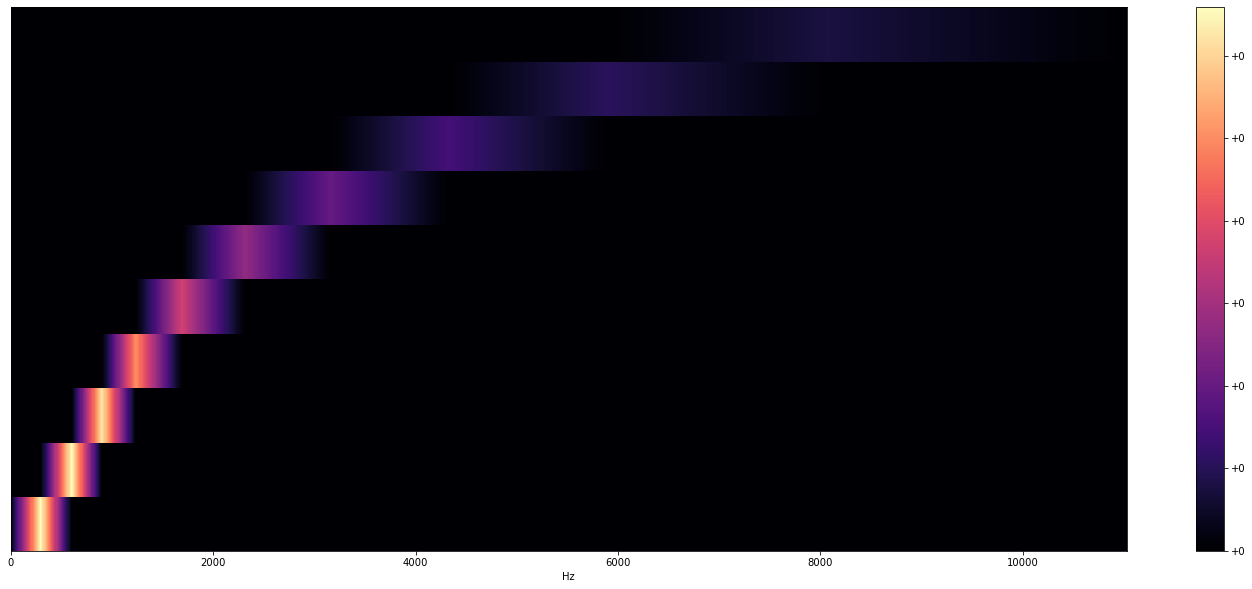

In [72]:
filter_bank = librosa.filters.mel(n_fft =2048, sr = 22050, n_mels = 10)
filter_bank.shape
#(mel band, nyquist frequency of n_fft - 1 )
plt.figure(figsize = (25,10))
librosa.display.specshow(filter_bank, sr= sample_rate,x_axis = 'linear')
plt.colorbar(format='%+2.f')
plt.show()
#blocks in the figure are mel bands 

In [82]:
mel_spectrogram = librosa.feature.melspectrogram(audio_data, sr =sample_rate, n_fft = 2048,hop_length=512,n_mels=90 )
mel_spectrogram.shape
#size  = (mel band, number of frames )

(90, 10699)

In [80]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
#moving from logarithm to decible as the amplitute is preceived as logrithmic for human ear

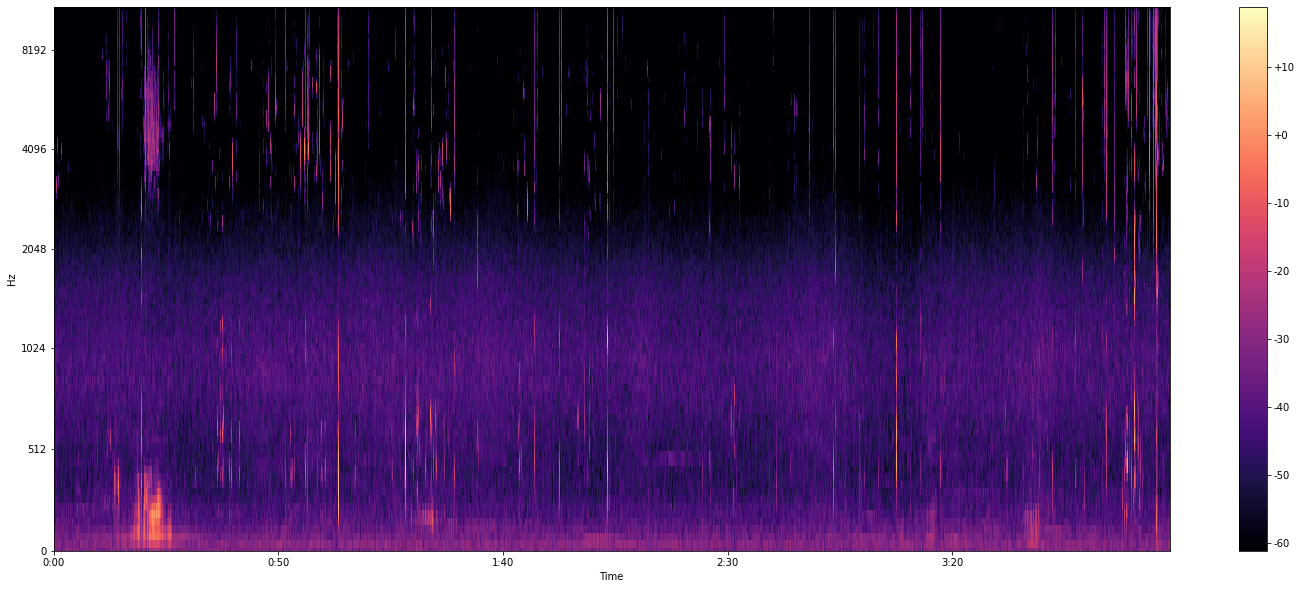

In [81]:
plt.figure(figsize = (25,10))
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
librosa.display.specshow(log_mel_spectrogram,x_axis = 'time',y_axis='mel',sr=sample_rate)
plt.colorbar(format='%+2.f')
plt.show()

#### MFCC is a very compressible representation, often using just 20 or 13 coefficients instead of 32-64 bands in Mel spectrogram. The MFCC is a bit more decorrelarated, which can be beneficial with linear models like Gaussian Mixture Models. With lots of data and strong classifiers like Convolutional Neural Networks, mel-spectrogram can often perform better. We need to try each of these spectrogram while creating our model as different model reacts differently to the combination like in the research paper we are following has used MFCC with CNN, so while creating ML model we need to do a bit of experiments with different combination. 

The sample rate is 22050 and the audio data is [-1.2772126e-07 -2.6762461e-06  1.0470579e-05 ...  1.6908690e-04
  1.8034471e-04  2.1558130e-04] 
The tempo is 103.359375 and the beat frame is [ 130  152  176  198  224  249  273  299  324  346  373  397  421  445
  469  492  515  540  563  588  613  640  667  693  717  742  766  790
  815  839  865  891  916  939  966  994 1018 1041 1065 1089 1113 1137
 1163 1189 1214 1237 1263 1288 1312 1338 1364 1390 1415 1441 1466 1491
 1520 1547 1571 1596 1623 1651 1679 1708 1736 1763 1791 1816 1841 1867
 1894 1921 1947 1973 2000 2025 2048 2076 2102 2130 2158 2184 2208 2234
 2258 2283 2306 2330 2355 2382 2408 2435 2458 2484 2509 2535 2560 2586
 2611 2638 2664 2690 2716 2742 2768 2794 2821 2848]


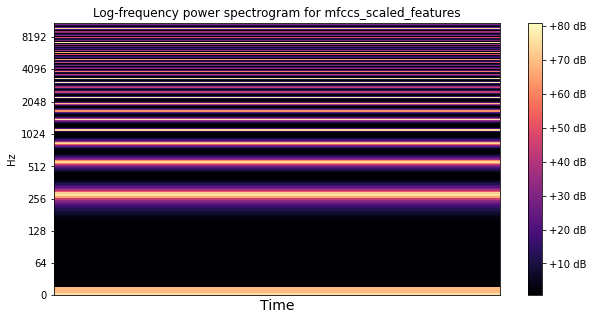

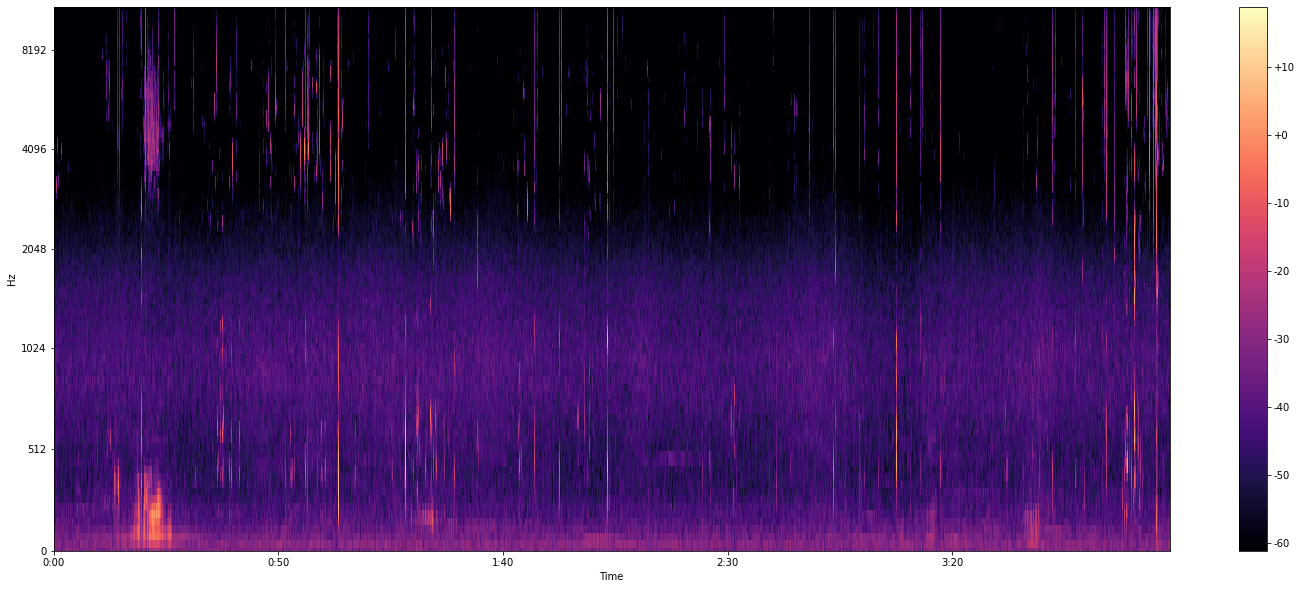

In [83]:
#!/usr/bin/env python
# coding: utf-8

# In[52]:


import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
from scipy.io import wavfile as wav
import numpy as np
import pandas as pd


# ### Mel-frequency cepstrum coefficients

# In[68]:


filename= 'BallRacketWithWilsonAtHome.wav'
ipd.Audio(filename)
audio, sample_rate = librosa.load(filename)

#audio data
print(f'The sample rate is {sample_rate} and the audio data is {audio} ')
#beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=audio, sr=sample_rate)
print(f'The tempo is {tempo} and the beat frame is {beat_frames}')
# feature extraction
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc =40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
#graph plotting
plot_spectrogram(mfccs_scaled_features, 'mfccs_scaled_features')


# ### Mel Spectrograms

# In[61]:


filename= 'BallRacketWithWilsonAtHome.wav'
ipd.Audio(filename)
audio, sample_rate = librosa.load(filename)




# In[82]:


mel_spectrogram = librosa.feature.melspectrogram(audio_data, sr =sample_rate, n_fft = 2048,hop_length=512,n_mels=90 )
mel_spectrogram.shape
#size  = (mel band, number of frames )


# In[80]:


log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
#moving from logarithm to decible as the amplitute is preceived as logrithmic for human ear


# In[81]:


plt.figure(figsize = (25,10))
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
librosa.display.specshow(log_mel_spectrogram,x_axis = 'time',y_axis='mel',sr=sample_rate)
plt.colorbar(format='%+2.f')
plt.show()


# #### MFCC is a very compressible representation, often using just 20 or 13 coefficients instead of 32-64 bands in Mel spectrogram. The MFCC is a bit more decorrelarated, which can be beneficial with linear models like Gaussian Mixture Models. With lots of data and strong classifiers like Convolutional Neural Networks, mel-spectrogram can often perform better. We need to try each of these spectrogram while creating our model as different model reacts differently to the combination like in the research paper we are following has used MFCC with CNN, so while creating ML model we need to do a bit of experiments with different combination. 

# In[ ]:





# In[ ]:




